Shape Convert with PIL    : (72, 72, 4)
Shape Convert with OpenCV : (72, 72, 4)


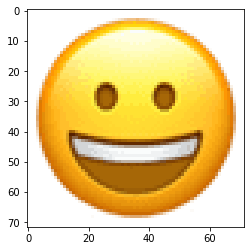

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import base64
import io
import cv2

emoji = pd.read_csv('full_emoji.csv')
base64_decoded = base64.b64decode(emoji['Apple'][0].split(',')[-1])
image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
plt.imshow(image)

print(f"Shape Convert with PIL    : {np.array(image).shape}")
print(f"Shape Convert with OpenCV : {cv2.imdecode(np.frombuffer(base64_decoded, np.uint8), -1).shape}")

In [2]:
def ret_arr_img_cv2(x):
    base64_decoded = base64.b64decode(x.split(',')[-1])
    img =  cv2.imdecode(np.frombuffer(base64_decoded, np.uint8), -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
    return img

def ret_arr_img_io(x):
    base64_decoded = base64.b64decode(x.split(',')[-1])
    img = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
    return np.array(img)

In [3]:
%%time
raic = emoji['Apple'][:100].apply(ret_arr_img_cv2)

CPU times: user 21.1 ms, sys: 5.02 ms, total: 26.1 ms
Wall time: 37.8 ms


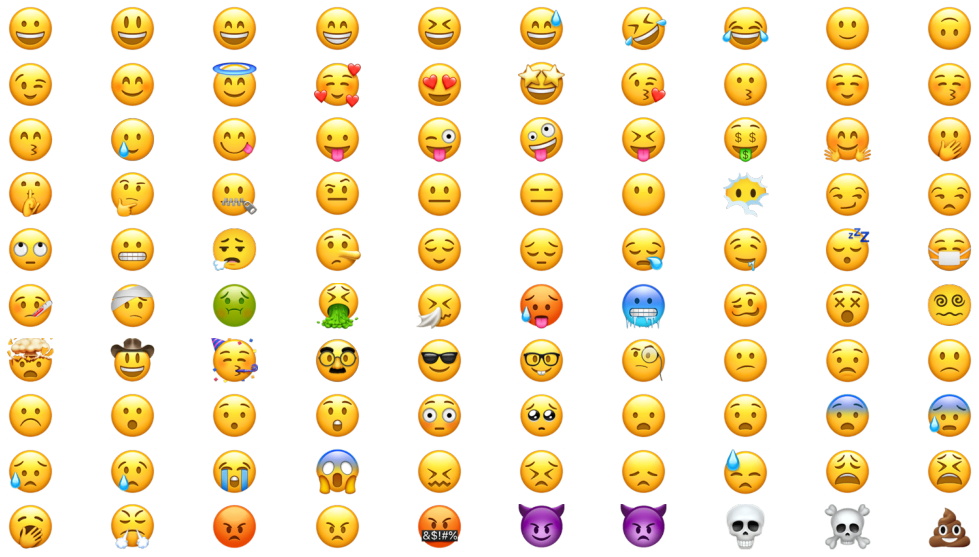

In [4]:
fig, axes = plt.subplots(10,10, figsize=(18,10))
for idx, ax in enumerate(axes.flat):
    ax.imshow(raic[idx])
    ax.axis('off')
plt.show()

In [5]:
%%time
raii = emoji['Apple'][:100].apply(ret_arr_img_io)

CPU times: user 64.3 ms, sys: 5.73 ms, total: 70 ms
Wall time: 77.2 ms


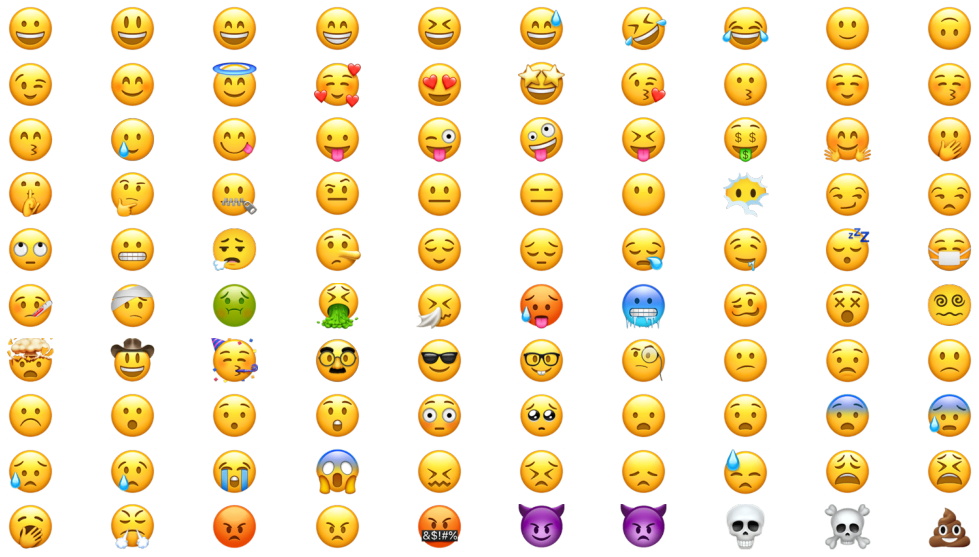

In [6]:
fig, axes = plt.subplots(10,10, figsize=(18,10))
for idx, ax in enumerate(axes.flat):
    ax.imshow(raic[idx])
    ax.axis('off')
plt.show()

In [7]:
%%time

all_emoji = emoji[['#', 'Apple', 'Google', "Facebook", 'Windows', 
                   'Twitter', 'JoyPixels' , 'Samsung']].melt(id_vars=['#']).dropna()


def ret_arr_img_label(x):
    base64_decoded = base64.b64decode(x[0].split(',')[-1])
    img = cv2.imdecode(np.frombuffer(base64_decoded, np.uint8), -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
    label = x[1]
    return img, label


arr_all_emoji = all_emoji[['value', '#']].apply(ret_arr_img_label, axis=1)

CPU times: user 1.82 s, sys: 168 ms, total: 1.99 s
Wall time: 2.07 s


(108, 108, 4)


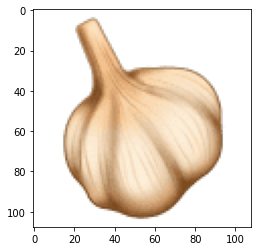

(108, 108, 4)


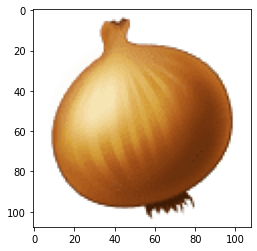

In [8]:
different_shape = arr_all_emoji.map(lambda x : x[0].shape != (72,72,4))
for tpl in arr_all_emoji[different_shape]:
    print(tpl[0].shape)
    plt.imshow(tpl[0])
    plt.show()

Shape of data  : (12167, 72, 72, 4)
Shape of label : (12167, 1)


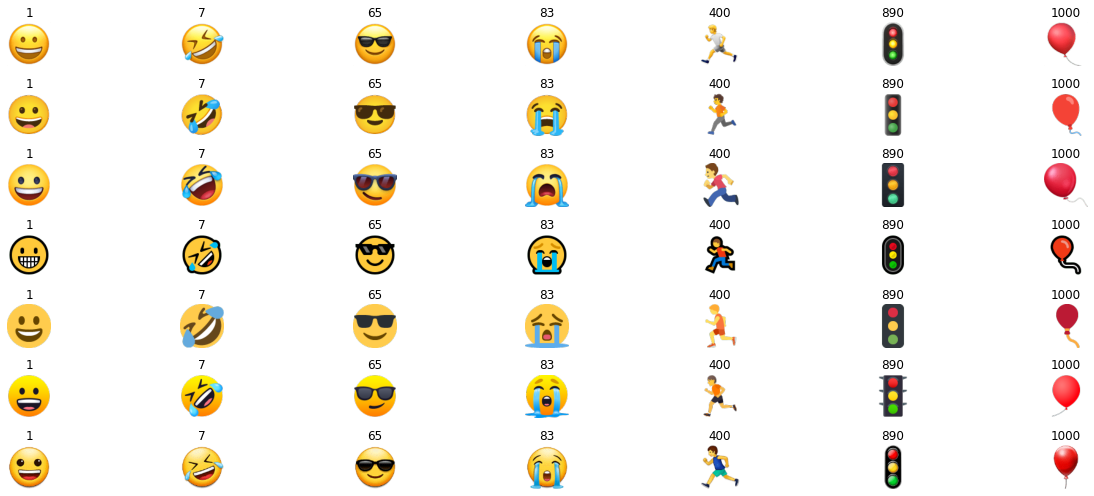

In [9]:
all_emoji_same_shape = arr_all_emoji[~different_shape]
data = np.stack(all_emoji_same_shape.map(lambda x: x[0]).to_numpy())
labels = all_emoji_same_shape.map(lambda x: x[1]).to_numpy()[:, None]

print(f"Shape of data  : {data.shape}")
print(f"Shape of label : {labels.shape}")


fig, axes = plt.subplots(7,7, figsize=(18,7))
slct_labels = np.array([1, 7, 65, 83, 400, 890, 1000])

idx = np.where(labels == slct_labels)[0]
for i , ax in enumerate(axes.flat):
    ax.imshow(data[idx[i]])
    ax.set_title(labels[idx[i]].item())
    ax.axis('off')
fig.tight_layout()
plt.show()

In [10]:
%%time

def ret_arr_img(x):
    base64_decoded = base64.b64decode(x.split(',')[-1])
    img = cv2.imdecode(np.frombuffer(base64_decoded, np.uint8), -1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
    img = cv2.resize(img, (28,28))
    return img

emoji_apple = emoji['Apple'].dropna()
arr_emoji_apple = emoji_apple.apply(ret_arr_img)

print(f"Size Emoji Apple before Drop NaN : {emoji['Apple'].shape[0]}")
print(f"Size Emoji Apple after  Drop NaN : {len(emoji_apple)}\n\n")

Size Emoji Apple before Drop NaN : 1816
Size Emoji Apple after  Drop NaN : 1813


CPU times: user 232 ms, sys: 8.65 ms, total: 241 ms
Wall time: 252 ms


Shape of data  : (1813, 28, 28, 4)
Shape of label : (1813, 1)


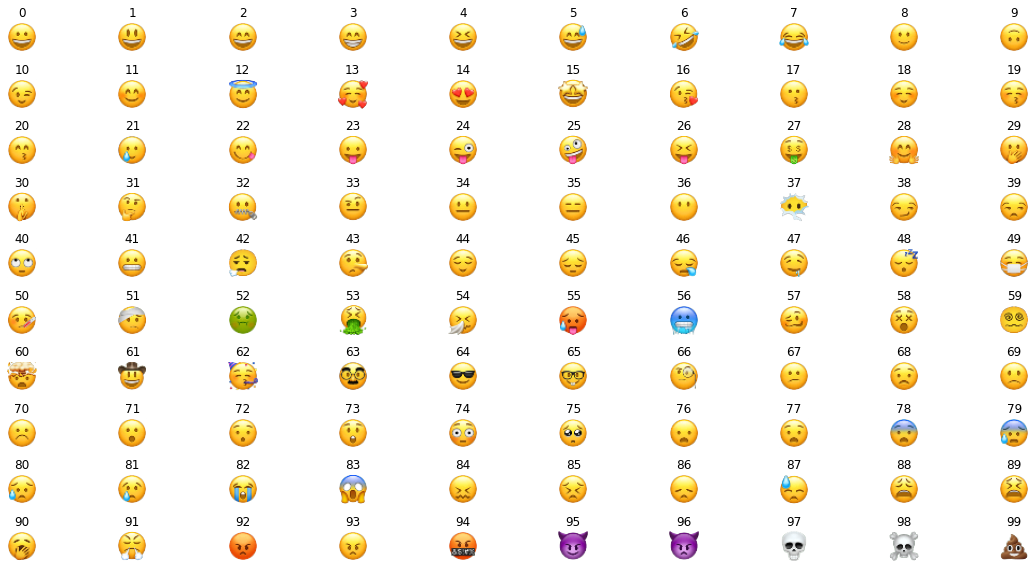

In [13]:
data = np.stack(arr_emoji_apple.to_numpy())
labels = arr_emoji_apple.index.to_numpy()[:, None]

print(f"Shape of data  : {data.shape}")
print(f"Shape of label : {labels.shape}")

fig, axes = plt.subplots(10,10, figsize=(16,8))
for idx, ax in enumerate(axes.flat):
    ax.imshow(data[idx])
    ax.set_title(labels[idx].item())
    ax.axis('off')
fig.tight_layout()
plt.show()

In [14]:
np.savez_compressed('dataset_emoji_apple_small.npz', data=data, labels=labels)

In [15]:
npz_dataset = np.load('dataset_emoji_apple_small.npz')
print(npz_dataset.files)
data   = npz_dataset['data']
labels = npz_dataset['labels']
data.shape

['data', 'labels']


(1813, 28, 28, 4)